In [130]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import rcParams
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_context("poster")

In [59]:
df = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

In [60]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
df.shape

(1460, 81)

In [62]:
df[df['GrLivArea']>4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [63]:
df = df[df.GrLivArea < 4000]

In [64]:
df.shape

(1456, 81)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
Id               1456 non-null int64
MSSubClass       1456 non-null int64
MSZoning         1456 non-null object
LotFrontage      1197 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null object
Alley            91 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
Utilities        1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-n

In [66]:
# To check how many columns have missing values
col_miss_val_list = df.columns[df.isnull().any()].tolist()

In [67]:
col_miss_val_list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [68]:
df[col_miss_val_list].isnull().sum()

LotFrontage      259
Alley           1365
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1451
Fence           1176
MiscFeature     1402
dtype: int64

In [125]:
corr = df.corr()['SalePrice']
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.800858
GrLivArea        0.720516
GarageCars       0.649256
TotalBsmtSF      0.646584
GarageArea       0.636964
1stFlrSF         0.625235
FullBath         0.559048
TotRmsAbvGrd     0.537462
YearBuilt        0.535279
YearRemodAdd     0.521428
GarageYrBlt      0.499230
MasVnrArea       0.478862
Fireplaces       0.466765
BsmtFinSF1       0.395923
LotFrontage      0.356773
OpenPorchSF      0.330361
WoodDeckSF       0.322538
2ndFlrSF         0.297301
HalfBath         0.282925
LotArea          0.269866
BsmtFullBath     0.235697
BsmtUnfSF        0.220678
BedroomAbvGr     0.160542
ScreenPorch      0.118324
MoSold           0.056797
3SsnPorch        0.047414
PoolArea         0.032819
BsmtFinSF2      -0.008900
MiscVal         -0.021097
YrSold          -0.023694
LowQualFinSF    -0.025351
Id              -0.027455
BsmtHalfBath    -0.036792
OverallCond     -0.080202
MSSubClass      -0.088160
EnclosedPorch   -0.129774
KitchenAbvGr    -0.138849
Name: SalePr

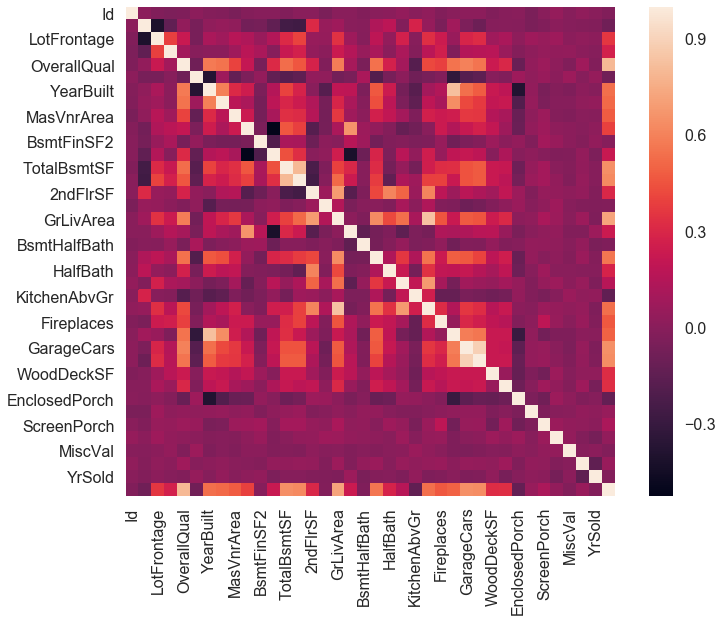

In [132]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), square=True)

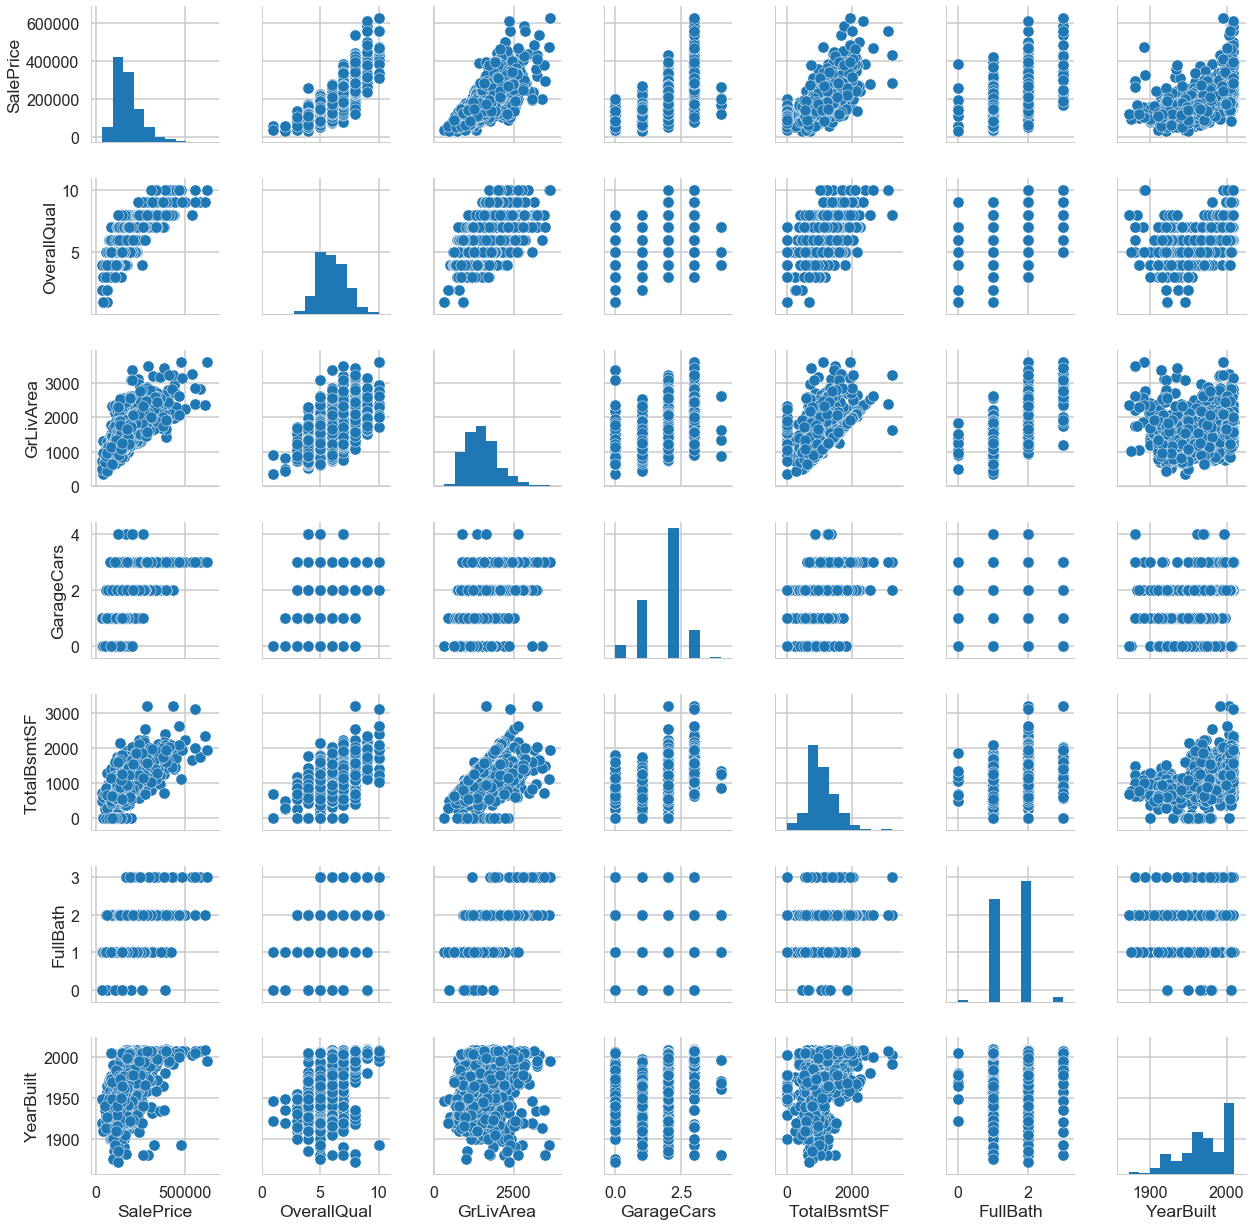

In [133]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

Let's look at variables with missing values.

LotFrontage: Linear feet of street connected to property. It has quiet low correlation with the price so we can remove it or put mean instead of missing values.

Alley: Type of alley access to property. Many missing values, maybe these properties just don't have an alley access. Change to None. 

MasVnrType/MasVnrArea: both have 8 values missing, probably they are the same ones. I'm going to set most frequent one.

Bsmt.... Variables: A number of variables in connection with the basement. About the same number of missing values. However, there are two basement-related variables without missing values "BsmtFinSF1" and "BsmtFinSF2" - let's look at those and then decide what to do with the missing values.

Electrical: Just one missing value - here just impute most frequent one.

FireplaceQu: I assume the properties with missing values just don't have a fireplace. There's also the variable Fireplaces (without missing values) - check this and then decide.

Garage ... Variables: 81 missing in these columns. However, there are some Garage-related variables without missing values: GarageCars, GarageArea - check these and then decide.

PoolQC - probably no pool - but check against PoolArea (which has no missing values).

Fence: Too many missing values - probably no fence, insert None.

MiscFeature: Too many missing values - probably no fence, insert None.

In [70]:
#Change 'MiscFeature', 'Fence', 'Alley'
df_cleaned = df.copy()
df_cleaned.loc[df_cleaned['MiscFeature'].isnull(),'MiscFeature'] = 'None'
df_cleaned.loc[df_cleaned['Fence'].isnull(),'Fence'] = 'None'
df_cleaned.loc[df_cleaned['Alley'].isnull(),'Alley'] = 'None'

In [71]:
df_cleaned.shape

(1456, 81)

In [72]:
#LotFrontage
df_cleaned['LotFrontage'] = df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].mean())

In [73]:
#MasVnrType/MasVnrArea
df[['MasVnrType','MasVnrArea']][df['MasVnrType'].isnull()==True]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


As we can see the missing values for MasVnrType and MasVnrArea variables are in the same rows.

In [74]:
df['MasVnrType'].value_counts()

None       863
BrkFace    444
Stone      126
BrkCmn      15
Name: MasVnrType, dtype: int64

'None' is the most frequent value, so I replace missing MasVnrType values with 'None' and  missing MasVnrArea values with 0.

In [75]:
df_cleaned.loc[df_cleaned['MasVnrType'].isnull(),'MasVnrType'] = 'None'

In [76]:
df_cleaned.loc[df_cleaned['MasVnrArea'].isnull(),'MasVnrArea'] = 0.0

In [77]:
#basement
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']][df['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


NaN values are in the rows with no basement, so they should also can be set as 'None'.

In [78]:
bsmt_columns = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for col in bsmt_columns:
    df_cleaned.loc[df_cleaned[col].isnull(),col] = 'None'

In [79]:
#fireplace
df[['Fireplaces','FireplaceQu']][df['FireplaceQu'].isnull()==True]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
17,0,NaN
18,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN


As we can see from above 690 just don't have a fireplace.

In [80]:
df_cleaned.loc[df_cleaned['FireplaceQu'].isnull(),'FireplaceQu'] = 'None'

In [81]:
#garage
garage_columns = ['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
df[garage_columns][df['GarageQual'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0


In [82]:
for col in garage_columns:
    if df[col].dtype==np.object:
        df_cleaned.loc[df_cleaned[col].isnull(),col] = 'None'
    else:
        df_cleaned.loc[df_cleaned[col].isnull(),col] = 0

In [83]:
#pool
df['PoolArea'][df['PoolQC'].isnull()==True].describe()

count    1451.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: PoolArea, dtype: float64

If PoolQC is empty, PoolArea is 0.

In [84]:
df_cleaned.loc[df_cleaned['PoolQC'].isnull(),'PoolQC'] = 'None'

In [85]:
#electrical
df['Electrical'].value_counts()

SBrkr    1330
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [86]:
df_cleaned.loc[df_cleaned['Electrical'].isnull(),'Electrical'] = 'SBrkr'

Checking for missing values:

In [87]:
df_cleaned.isnull().sum().describe()

count    81.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [88]:
df_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

C:\Users\wibot\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


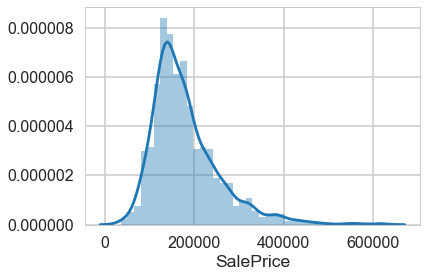

In [89]:
y = df_cleaned.pop('SalePrice')
sns.distplot(y)

C:\Users\wibot\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


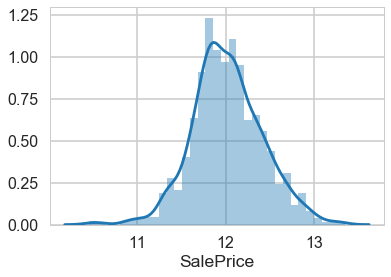

In [90]:
#taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.
y = np.log1p(y)
sns.distplot(y)

In [91]:
categorical_features = df_cleaned.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [92]:
numerical_features = df_cleaned.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [93]:
from scipy.stats import skew 
skewness = df_cleaned[numerical_features].apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.418175
PoolArea         17.504556
LotArea          12.574590
3SsnPorch        10.279262
LowQualFinSF      8.989291
KitchenAbvGr      4.476748
BsmtFinSF2        4.244209
BsmtHalfBath      4.124712
ScreenPorch       4.111400
EnclosedPorch     3.081275
MasVnrArea        2.654761
OpenPorchSF       2.337435
LotFrontage       1.692400
WoodDeckSF        1.549672
MSSubClass        1.404916
BsmtUnfSF         0.920809
1stFlrSF          0.866187
GrLivArea         0.834332
2ndFlrSF          0.777065
BsmtFinSF1        0.744088
OverallCond       0.689919
HalfBath          0.683518
TotRmsAbvGrd      0.660735
Fireplaces        0.632026
BsmtFullBath      0.590543
TotalBsmtSF       0.485894
MoSold            0.217659
BedroomAbvGr      0.214845
OverallQual       0.183681
GarageArea        0.132854
YrSold            0.093118
FullBath          0.017675
Id                0.001340
GarageCars       -0.343121
YearRemodAdd     -0.499316
YearBuilt        -0.609458
GarageYrBlt      -3.859250
d

In [94]:
skewness = skewness[abs(skewness)>0.75]
skewness.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtHalfBath', 'KitchenAbvGr', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [95]:
skew_features = df_cleaned[skewness.index]
skew_features.shape

(1456, 20)

In [96]:
# Log transform of the skewed numerical features to lessen impact of outliers
df_cleaned[skewness.index] = np.log1p(skew_features)
df_num = df_cleaned[numerical_features]
df_num.shape

(1456, 37)

In [97]:
df_cat = df_cleaned[categorical_features]
df_cat.shape

(1456, 43)

In [98]:
df_cat = pd.get_dummies(df_cat)
df_cat.shape

(1456, 265)

In [99]:
train = pd.concat([df_cat,df_num],axis=1)
train.shape

(1456, 302)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

Modeling

In [103]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    print("Train")
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [104]:
ENSTest = ElasticNetCV(alphas=[0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)

ElasticNetCV(alphas=[0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True, cv=None,
       eps=0.001, fit_intercept=True, l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99],
       max_iter=5000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)
Train
R2: 0.9345326839195418
RMSE: 0.09723259076314325
Test
R2: 0.926363846566655
RMSE: 0.10502604065106295


In [124]:
#GradientBoostingRegressor

param_grid = {'loss': ['ls', 'lad', 'huber', 'quantile'], 
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_split': [2,5,10],
              'max_depth': [1, 2, 3, 4, 5],
              'n_estimators': [100, 200, 300, 400, 500]
              }
gbr = ensemble.GradientBoostingRegressor()

gbr_cv = GridSearchCV(gbr, param_grid, cv=5)

# Fit the classifier to the training data
gbr_cv.fit(X_train, y_train)

train_test(gbr_cv, X_train, X_test, y_train, y_test)
#print(gbr_cv.best_params_)
#print(gbr_cv.best_score_)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'loss': ['ls', 'lad', 'huber', 'quantile'], 'max_features': ['auto', 'sqrt', 'log2', None], 'min_samples_split': [2, 5, 10], 'max_depth': [1, 2, 3, 4, 5], 'n_estimators': [100, 200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
Train
R2: 0.9657929134915172
RMSE: 0.07123819976593597
Test
R2: 0.907201508558473
RMSE: 0.11655911676908193


In [107]:
ridge = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], fit_intercept=[True, False], normalize = [True, False]).fit(X_train, y_train)
train_test(ridge, X_train, X_test, y_train, y_test)

RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv=None,
    fit_intercept=[True, False], gcv_mode=None, normalize=[True, False],
    scoring=None, store_cv_values=False)
Train
R2: 0.9463556656169171
RMSE: 0.08815355721105175
Test
R2: 0.9035383622055997
RMSE: 0.11988702432763035


In [123]:
lasso = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], fit_intercept=[True, False], normalize = [True, False], max_iter = 5000).fit(X_train, y_train)
train_test(lasso, X_train, X_test, y_train, y_test)

LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], copy_X=True, cv=None,
    eps=0.001, fit_intercept=[True, False], max_iter=5000, n_alphas=100,
    n_jobs=1, normalize=[True, False], positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)
Train
R2: 0.9384081258238978
RMSE: 0.0934733464722697
Test
R2: 0.9233587406757218
RMSE: 0.10694717410861436


In [116]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# specify parameters and distributions to sample from
param_dist = {'max_depth': [5,8,15,25,30,None],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_split': randint(1, 11),
              'min_samples_leaf': randint(1, 11),
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

# build a classifier
clf = RandomForestClassifier(n_estimators=10)

# Instantiate the RandomizedSearchCV object: random_search
random_search = RandomizedSearchCV(clf, param_dist,
                                   n_iter=10)
# Fit it to the data
random_search.fit(X_train.astype('int'),y_train.astype('int'))


# Print the tuned parameters and score
#print("Tuned RandomForestClassifier Parameters: {}".format(random_search.best_params_))
#print("Best score is {}".format(random_search.best_score_))
train_test(random_search, X_train.astype('int'), X_test.astype('int'), y_train.astype('int'), y_test.astype('int'))

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [5, 8, 15, 25, 30, None], 'max_features': ['sqrt', 'log2', None], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002396CA3EA58>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002396CA3E390>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)